In [1]:
import pandas as pd
import numpy as np
from scipy.misc import electrocardiogram
import wfdb as wd
import os
import neurokit2 as nk
import scipy.io
import scipy.signal
import seaborn as sns
from pandas import read_csv # importing cvs files 
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from scipy.misc import electrocardiogram
from scipy import signal
import matplotlib.pyplot as plt
from statistics import mean 

In [3]:


def load(filename_1):
    sampling_rate = 1000
    signals, fields = wd.rdsamp(filename_1)
    ecg = signals[:,1]
    total_duration = len(ecg) / sampling_rate
   # random_start_time = random.uniform(0, total_duration - 30)


    #start_index = int(random_start_time * sampling_rate)
    #end_index = start_index + int(30 * sampling_rate)

    random_window = ecg[590 * sampling_rate: 620 * sampling_rate]
    plt.figure(figsize = (20,5))
    plt.title("Random window Data for patient " + filename_1.strip('/Users/shrivassudharsan/Desktop/Data for CCIR'))
    plt.plot(random_window)
    return random_window

In [4]:
def downsample_ecg_signals(ecg_signals, original_sampling_rate, target_sampling_rate=100):
    resampling_factor = target_sampling_rate / original_sampling_rate
    downsampled_ecg_signals = signal.resample(ecg_signals, int(ecg_signals.shape[0] * resampling_factor), axis=0)
    return downsampled_ecg_signals

def normalize_ecg_signals(ecg_signals):
    #if len(ecg_signals.shape) == 1:
        #ecg_signals = ecg_signals.reshape(-1, 1)
    mean = np.mean(ecg_signals, axis=0)
    std = np.std(ecg_signals, axis=0)
    normalized_ecg_signals = (ecg_signals - mean) / std

    return normalized_ecg_signals

In [5]:
def r_peak():
      _, rpeaks1 = nk.ecg_peaks(random_window, sampling_rate=1000)
      return rpeaks1
      
def periodogram():
      f1, Pxx_den1 = scipy.signal.periodogram(random_window, 100,'flattop', scaling='spectrum')
      return f1

def frequency():
      f1, Pxx_den1 = scipy.signal.periodogram(random_window, 100,'flattop', scaling='spectrum')
      return Pxx_den1

       
def r_peak_calculations():
      df = pd.DataFrame(rpeaks)
      r_peak = df['ECG_R_Peaks'].tolist()
      return r_peak

def t_peak_calculations():
      yf = pd.DataFrame(waves_peak)
      t_peak = yf["ECG_T_Peaks"].tolist()
      t_peak = [value for value in t_peak if not np.isnan(value)]
      return t_peak

def p_peak_calculations():
      yf = pd.DataFrame(waves_peak)
      p_peak = yf["ECG_P_Peaks"].tolist()
      p_peak = [value for value in p_peak if not np.isnan(value)]
      return p_peak 

def q_peak_calculations():
      yf = pd.DataFrame(waves_peak)
      q_peak = yf["ECG_Q_Peaks"].tolist()
      q_peak = [value for value in q_peak if not np.isnan(value)]
      return q_peak

def s_peak_calculations():
      yf = pd.DataFrame(waves_peak)
      s_peak = yf["ECG_S_Peaks"].tolist()
      s_peak = [value for value in s_peak if not np.isnan(value)]
      return s_peak

def p_onset_calculations():
      yf = pd.DataFrame(waves_peak)
      p_onset = yf["ECG_P_Onsets"].tolist()
      p_onset = [value for value in p_onset if not np.isnan(value)]
      return p_onset

def amplitude_maxf():
    target_f2 = 50.0 
    closest_index = np.argmin(np.abs(f1 - 50.0))
    amplitude_atmax_frequency = Pxx_den1[closest_index]
    return amplitude_atmax_frequency
def amplitude_avg():
      v=0      
      for i in Pxx_den1:
            v += i
      avg_amplitude = max_amplitude/len(Pxx_den1)
      return avg_amplitude

def amplitude_avgf():
      target_f1 = 25.0 
      closest_index = np.argmin(np.abs(f1 - 25.0))
      amplitude_atavg_frequency = Pxx_den1[closest_index]
      return amplitude_atavg_frequency

def secondss_when_zero():
    seconds_when_zero = []
    for i in range(len(random_window)):
        if random_window[i] == 0:
            seconds_when_zero.append(i)
    avg_secondswhenzero_patient = np.mean(seconds_when_zero)/1

def feature_mean1():
      return np.mean(random_window)

def feature_std1():
      feature_std = np.std(random_window)
      return feature_std

def frequency_avg():
      y = 0
      for i in f1:
            y +=i
      avg_frequency = y/len(f1)
      return avg_frequency
      #avg_frequency = np.mean(f1)

def calculate_seconds_when_zero():
      avg_secondswhenzero_patient = []
      for i in range(len(random_window)):
            if random_window[i] == 0:
                  seconds_when_zero.append(i)

      avg_secondswhenzero_patient = np.mean(seconds_when_zero)/1
      return avg_secondswhenzero_patient

def classification():
      for i in range(len(list_data)):
            if x == "s0254DB" or x == "s0283DB" or x== "s0427DB" or x == "s0368DB" or x == "s0328DB" or x== "s0411DB":
                  labels = 0.0
            else:
                  labels = 1.0
      return labels

def control1():
      control = []
      for i in range(len(list_data)):
            if x == "s0254DB" or x == "s0283DB" or x== "s0427DB" or x == "s0368DB" or x == "s0328DB" or x== "s0411DB":
                  control.append(all_feautres2)
      return control

def diabetic1():
      diabetic = []
      for i in range(len(list_data)):
            if x != "s0254DB" or x != "s0283DB" or x!= "s0427DB" or x != "s0368DB" or x != "s0328DB" or x!= "s0411DB":
                  diabetic.append(all_feautres2)
      return diabetic
      


In [6]:
all_feautres2 = []

/var/folders/9x/clw12fjd1yj8w1q9wz6hk4cm0000gn/T/ipykernel_85138/1418778667.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (20,5))


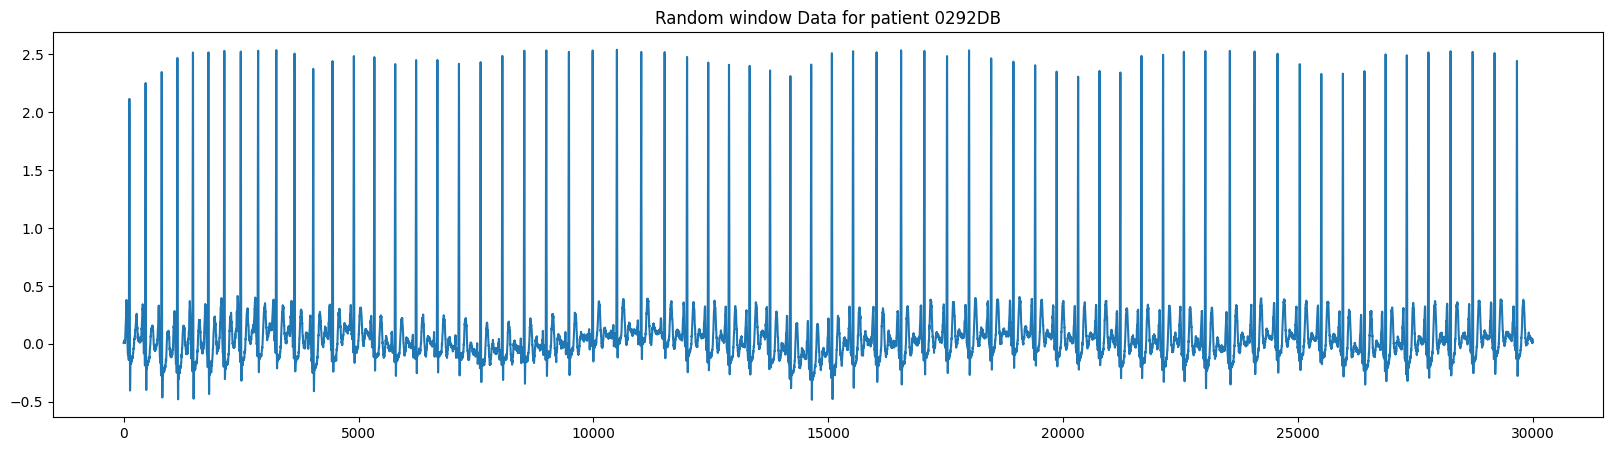

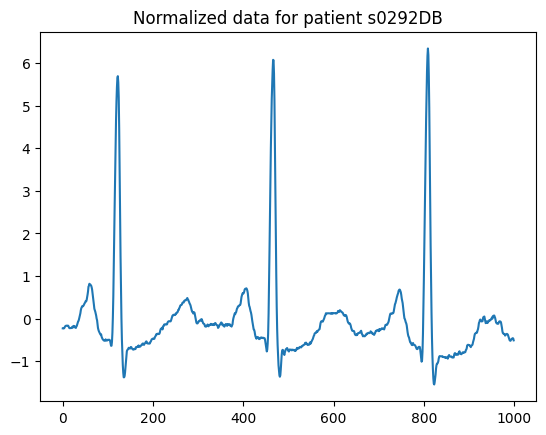

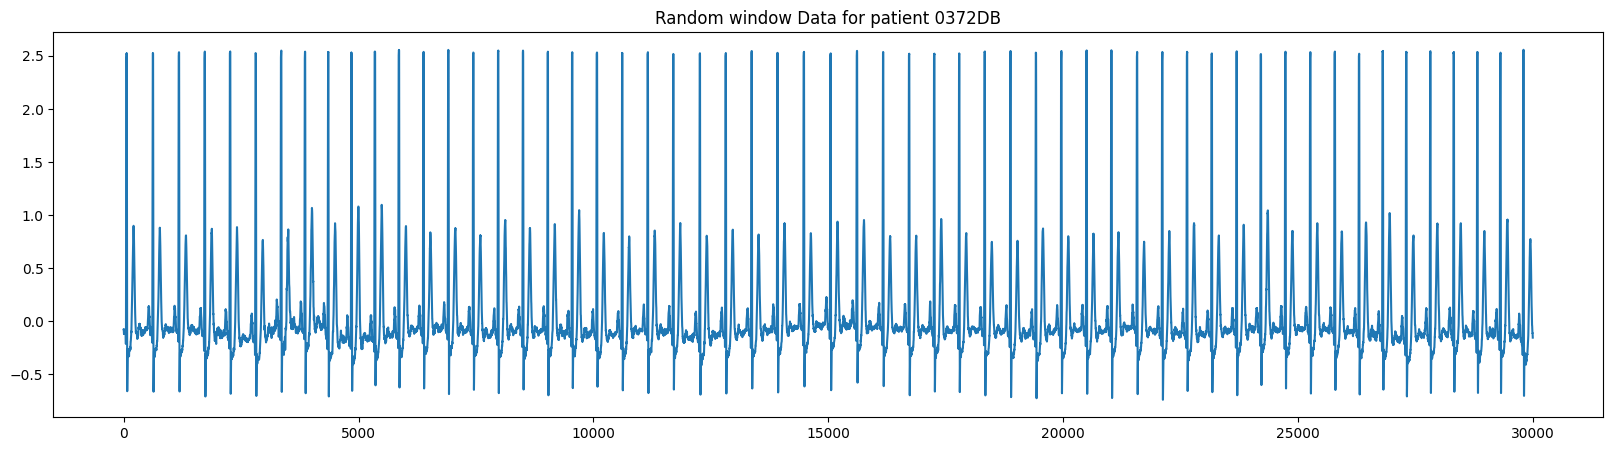

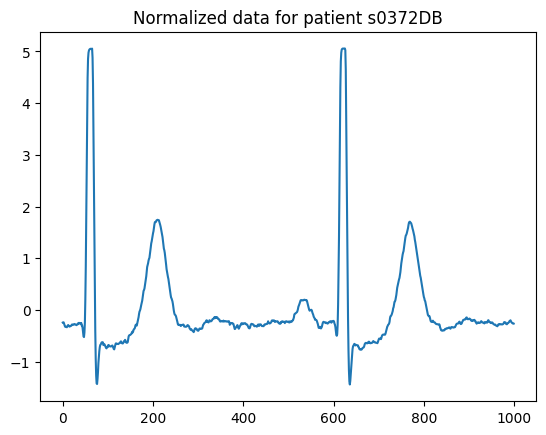

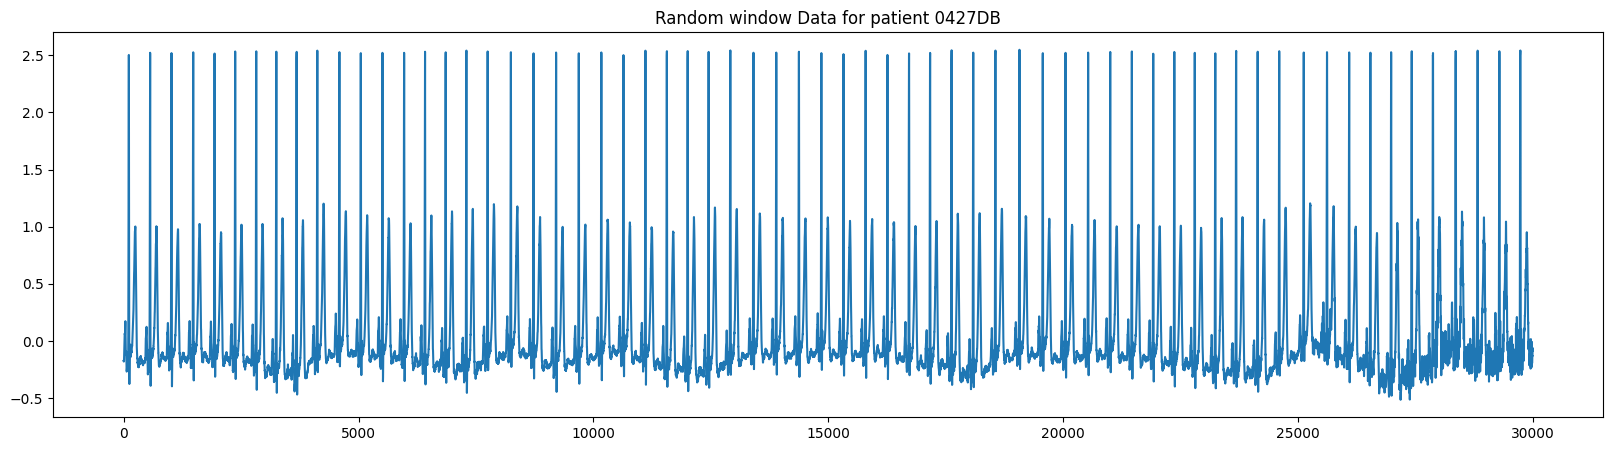

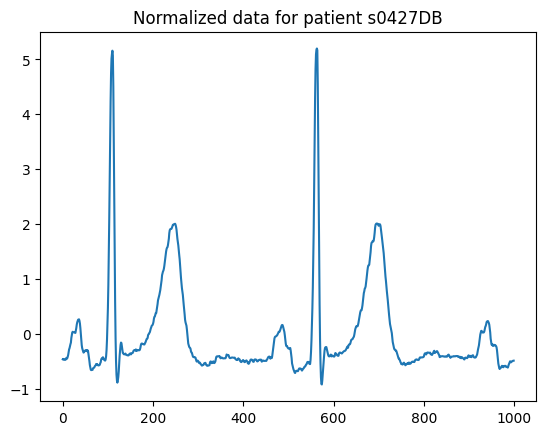

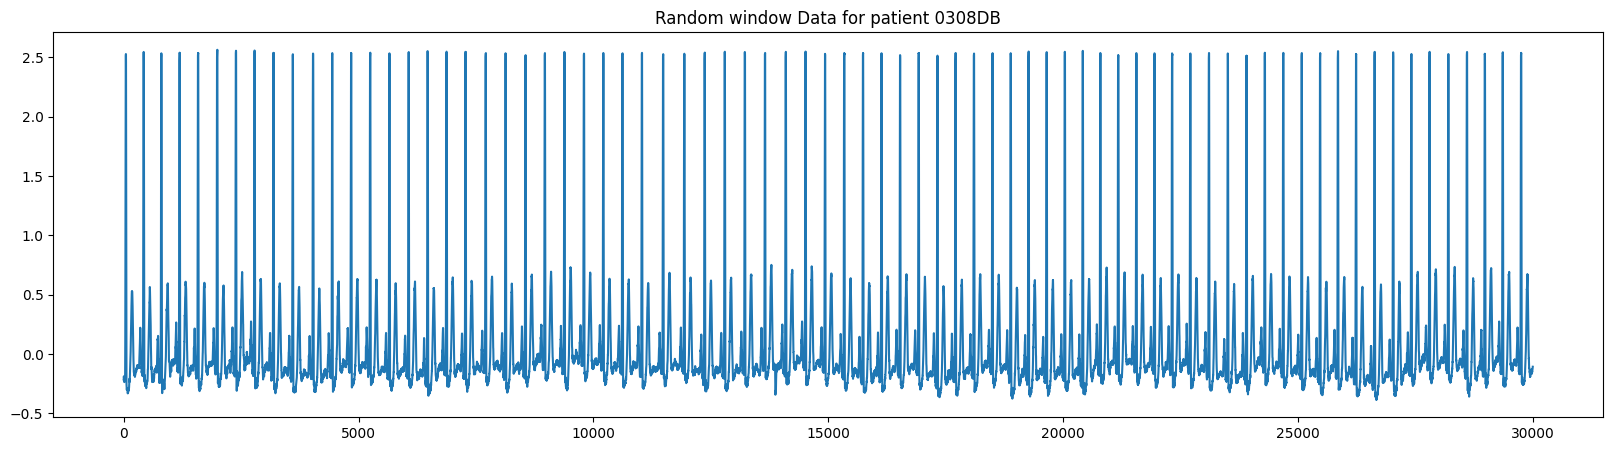

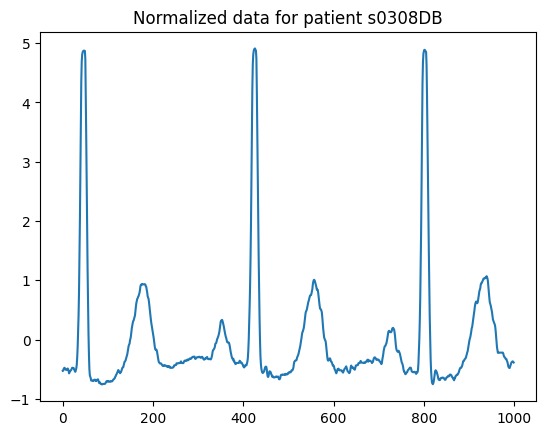

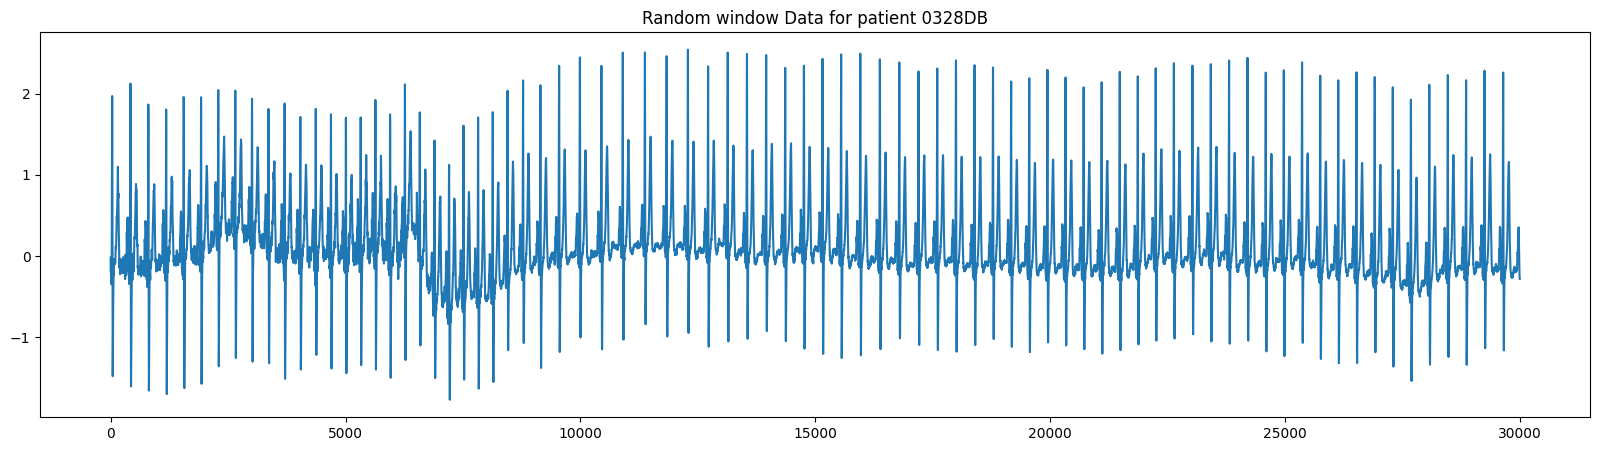

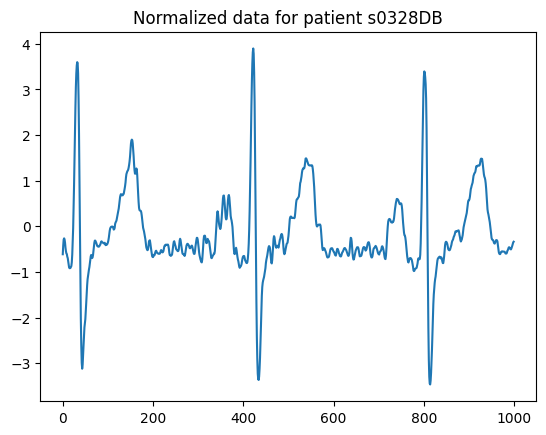

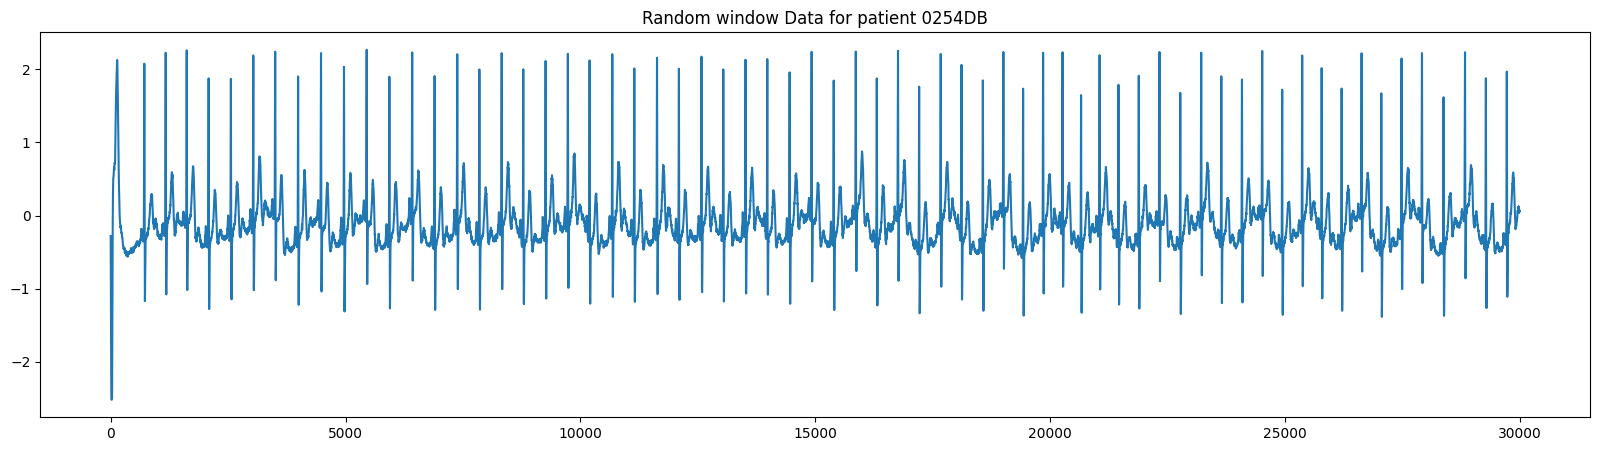

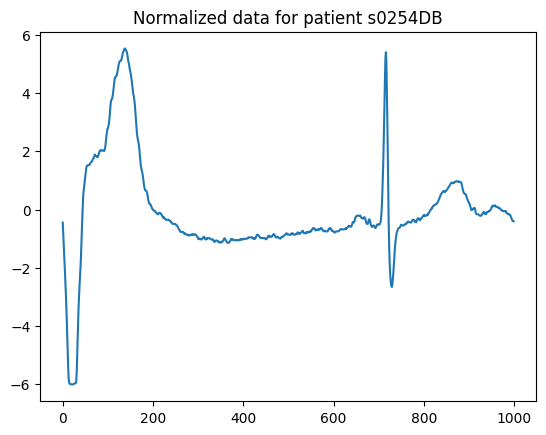

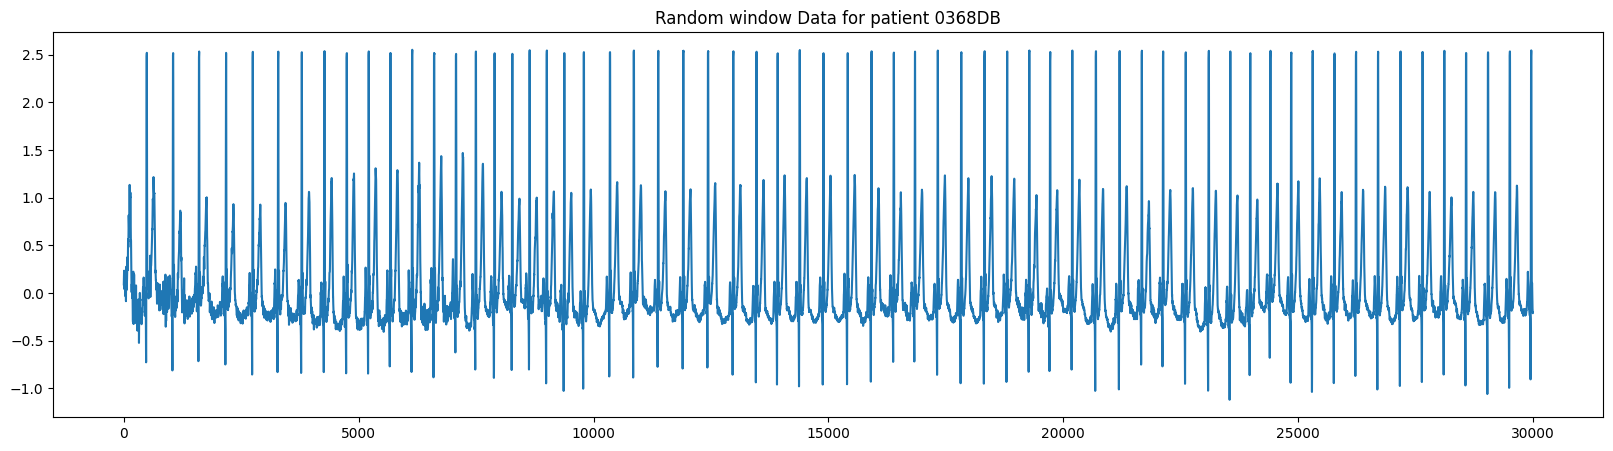

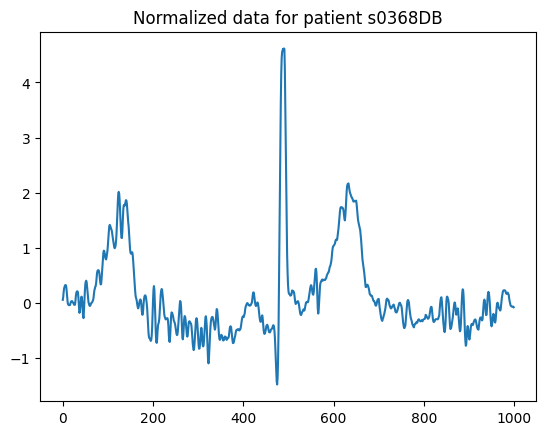

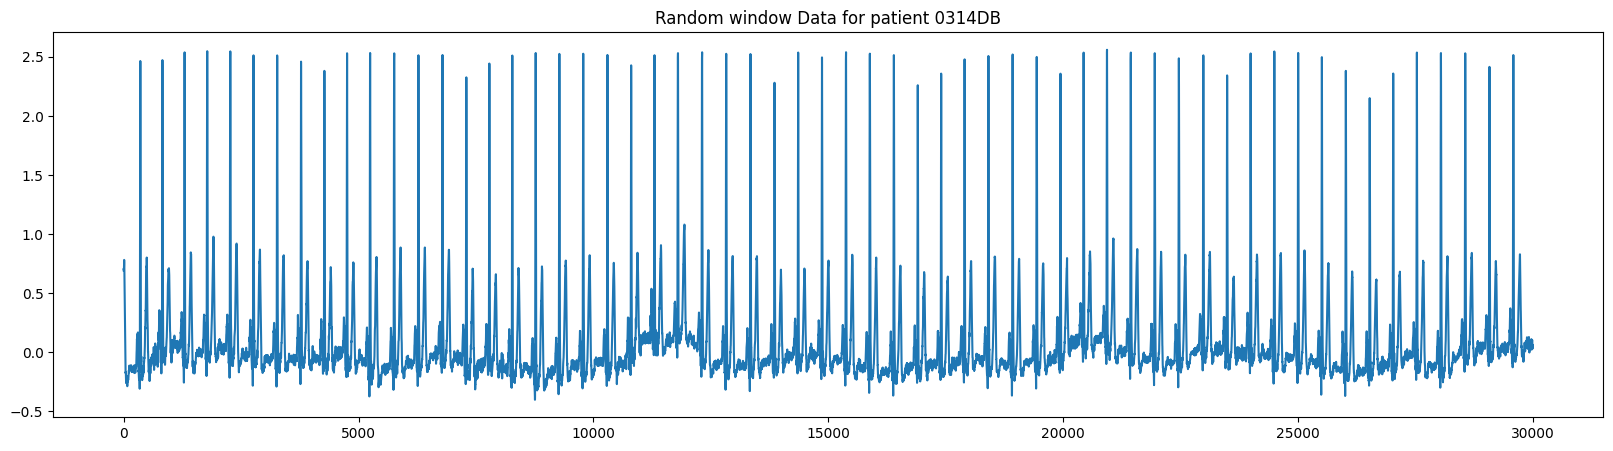

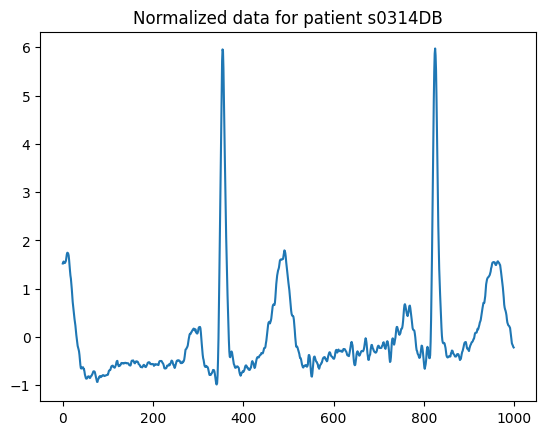

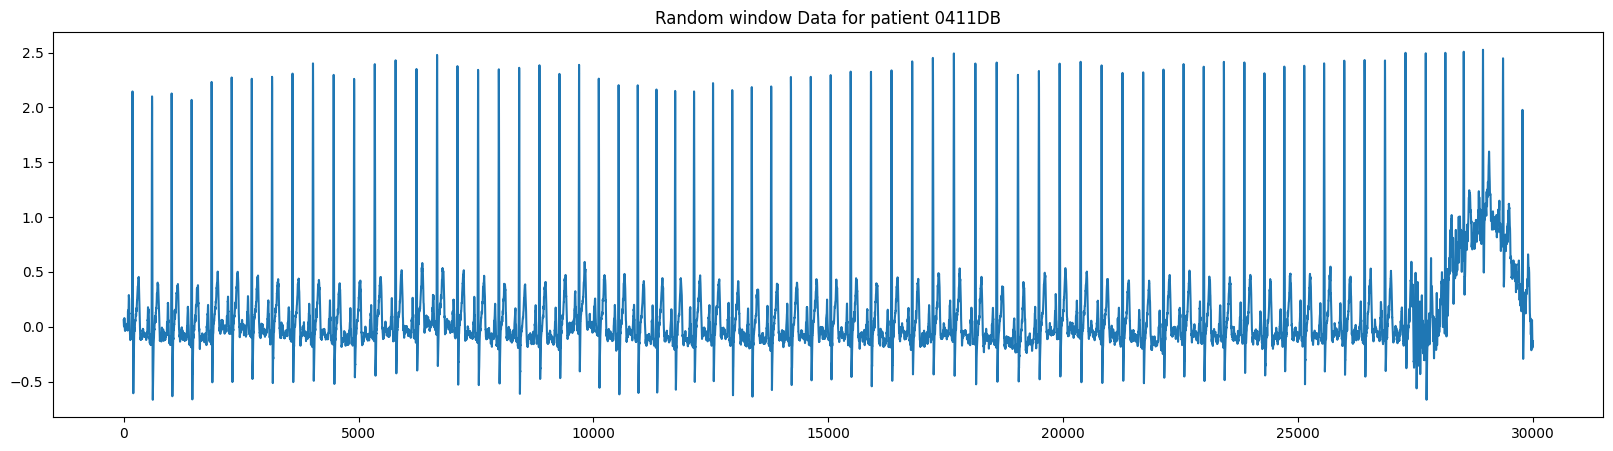

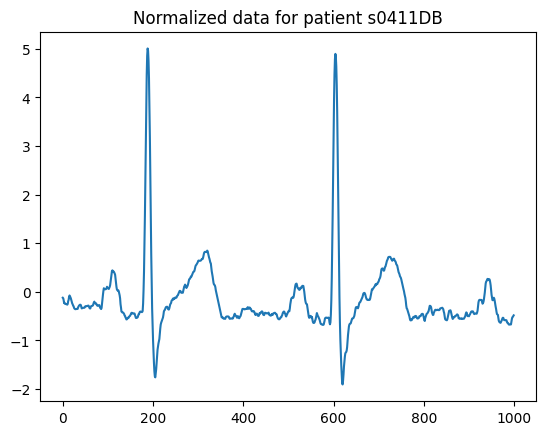

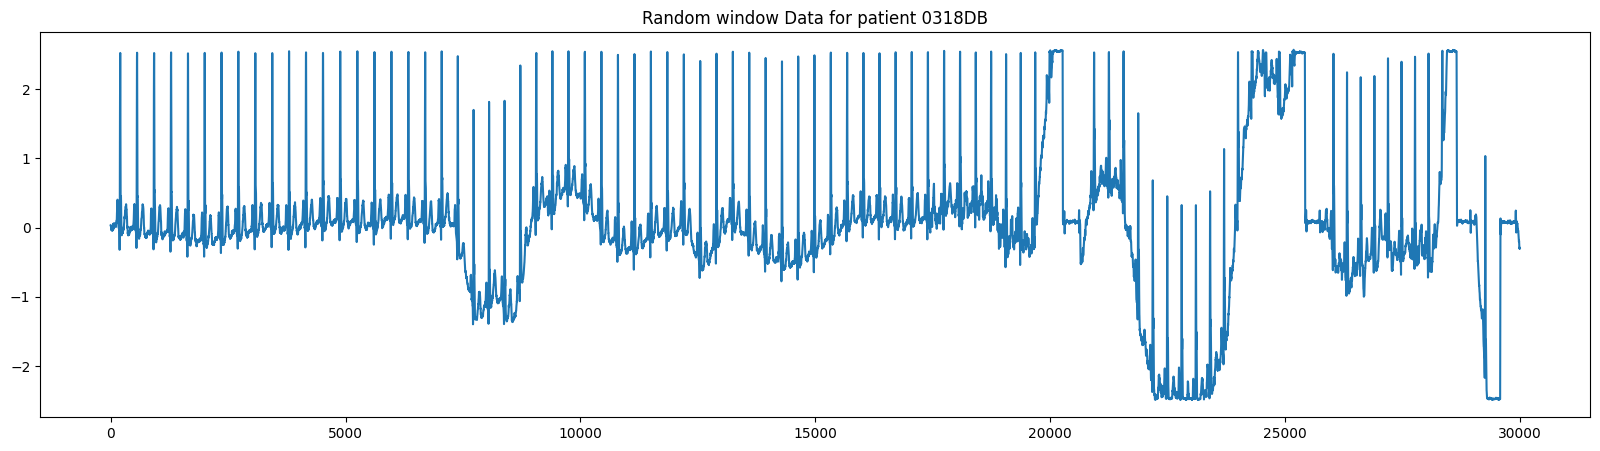

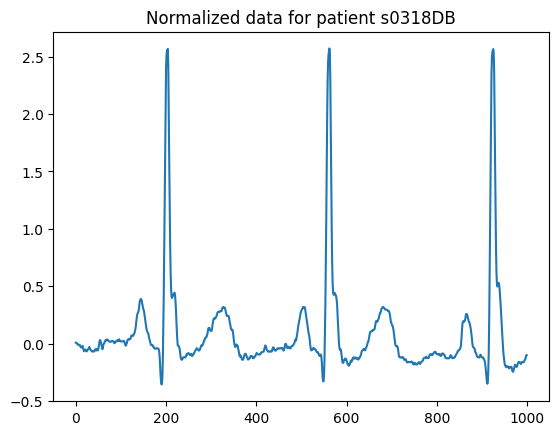

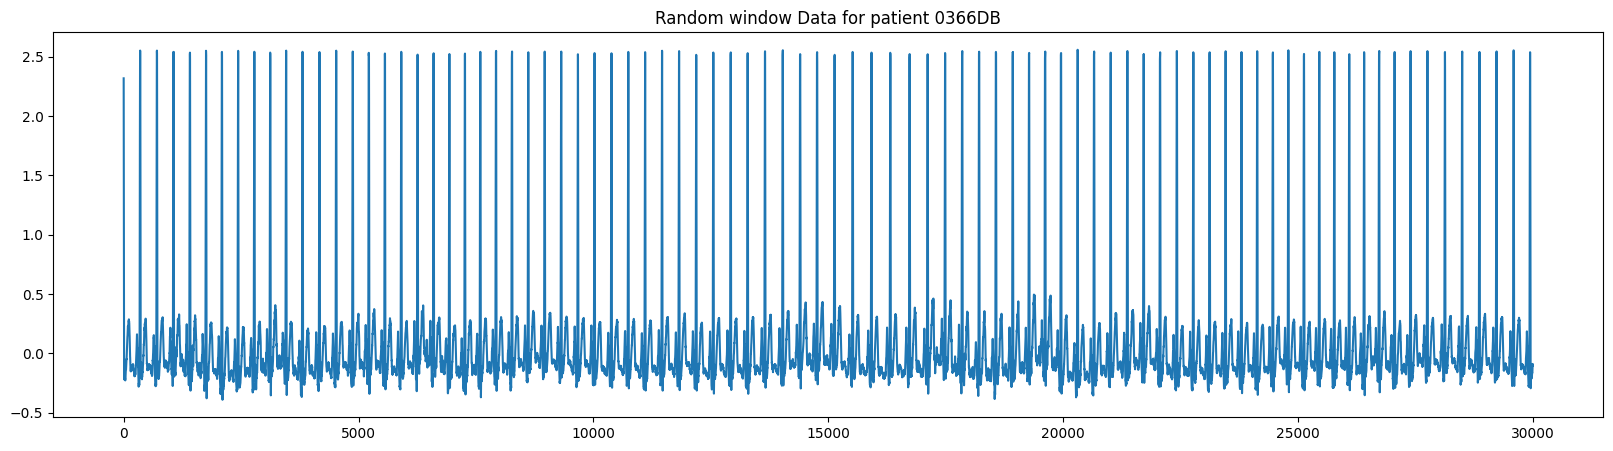

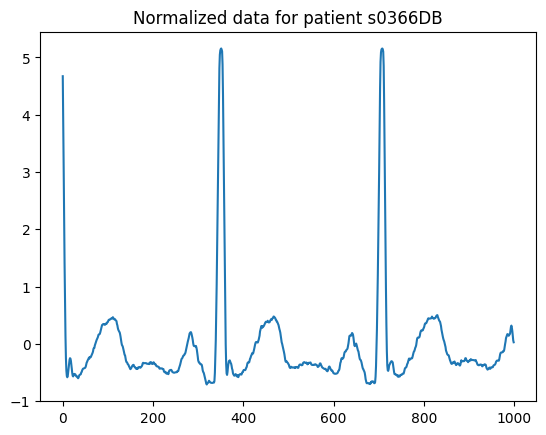

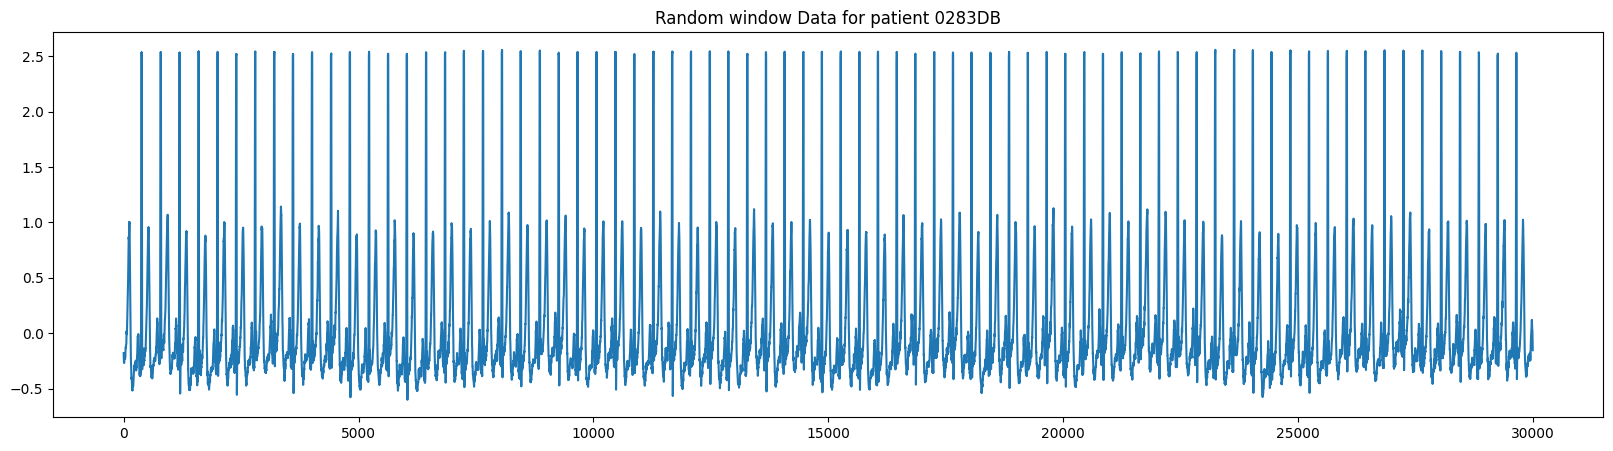

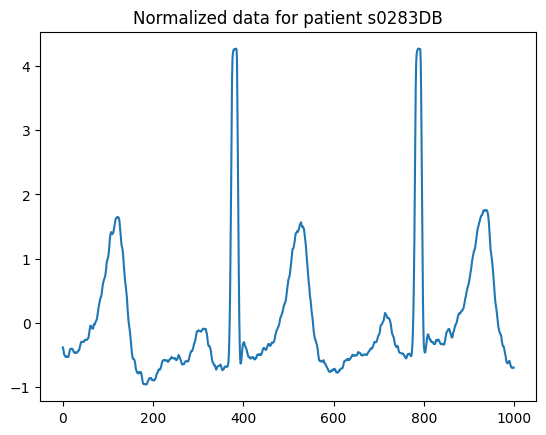

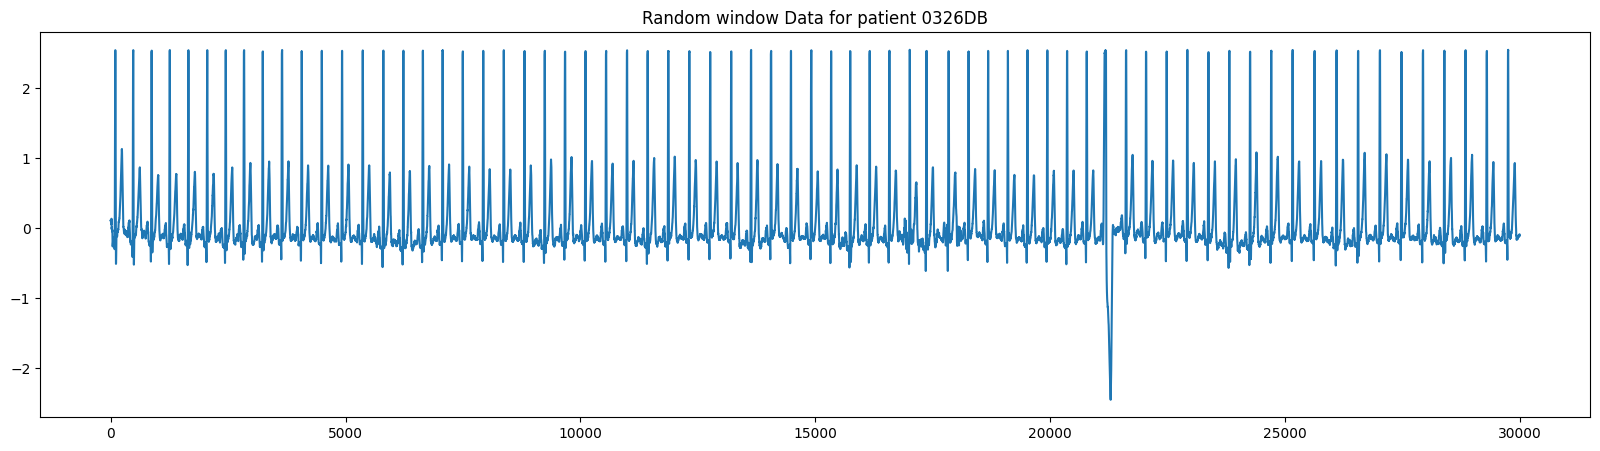

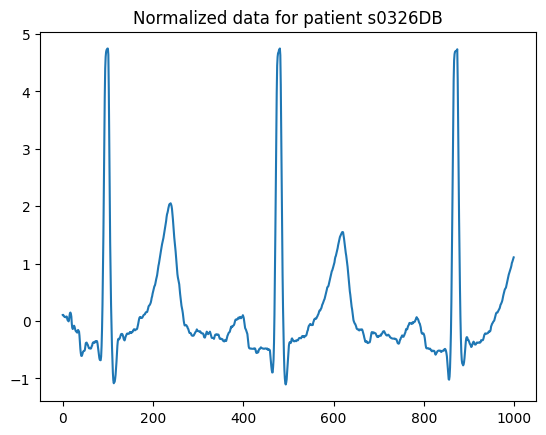

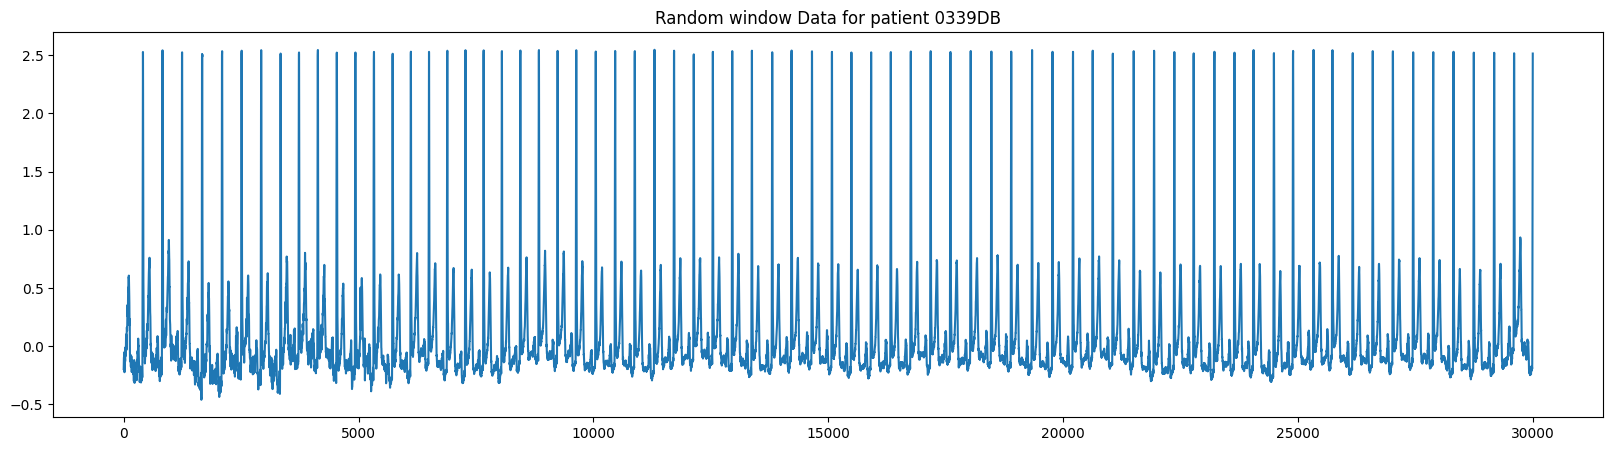

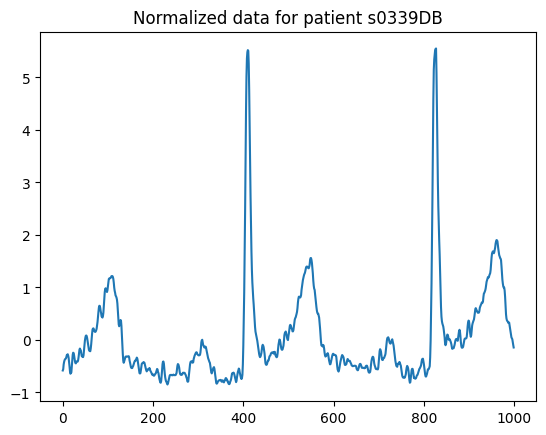

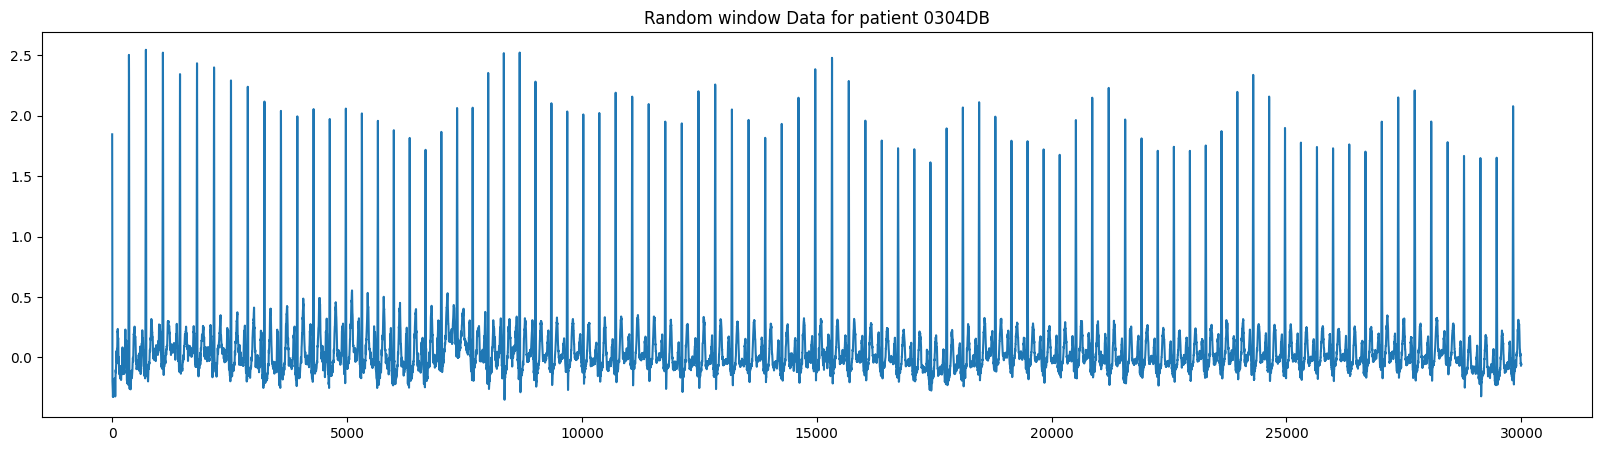

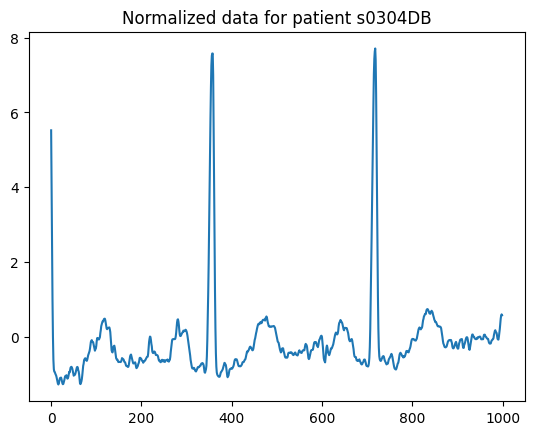

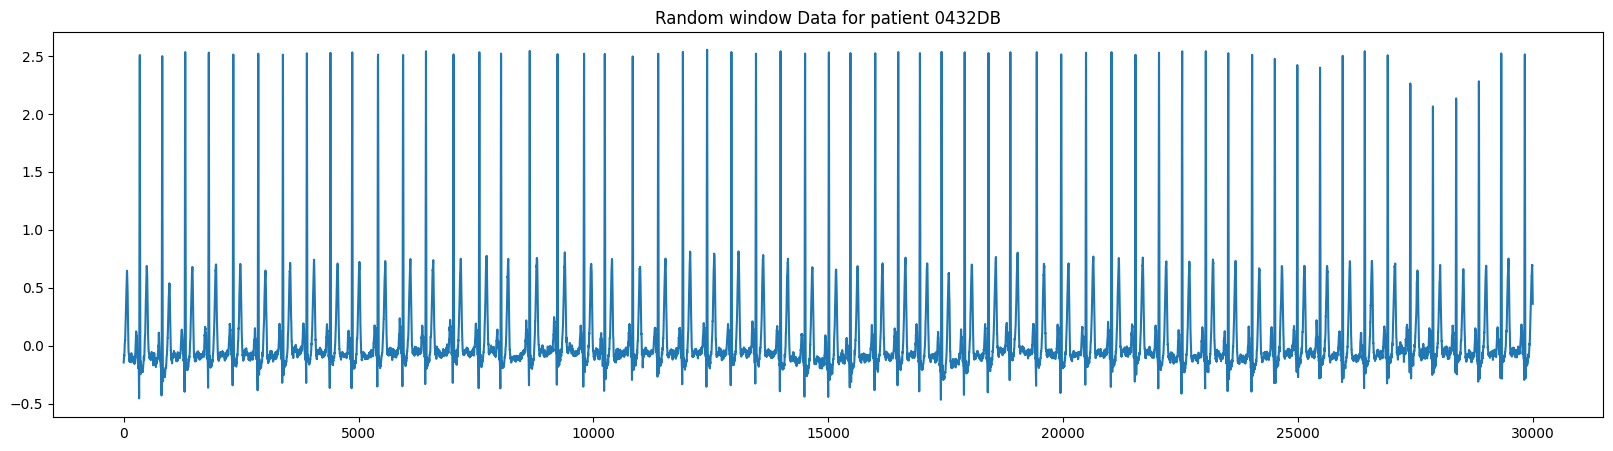

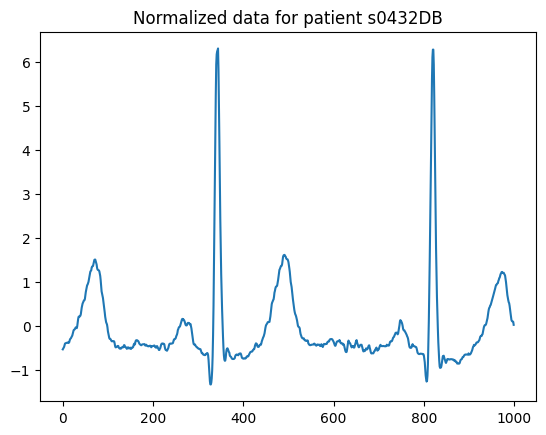

In [7]:
all_data = os.listdir('/Users/shrivassudharsan/Desktop/Data for CCIR')
list_data = []
#labels = []
for i in range(len(all_data)):
    filename = str(all_data[i])
    datfiles = filename.endswith('dat')
    if datfiles == True:
        list_data.append(filename)

v = 0 
y = 0
feature_dict = {}
seconds_when_zero = []
mno = []
pqr = []
data101112 = []
data161718 = []
stu = []
data131415 = []
all_feautres2 = []
all_subjects_features3 = []
all_subjects_features2 = []
all_subjects_features = []
data123 = []
data456 = []
diabetic1 = [] 
control1 = []
data789 = []
data192021 = []
data222324 = []
data252627 = []
diabetic1mean = []
diabetic1std = []
diabetic1avgr = []
diabetic1amplitudeatmax = []
diabetic1s_std = []
diabetic1p_avg_onset = []
diabetic1t_std = []
diabetic1avgsecondswhenzero = []
diabetic1p_avg = []
diabetic1q_std = []
control1mean = []
control1std = []
control1avgr = []
control1amplitudeatmax = []
control1s_std = []
control1p_avg_onset = []
control1t_std = []
control1avgsecondswhenzero = []
control1p_avg = []
control1q_std = []
fgh = []
jkl = []
for i in range(len(list_data)):

# data prep
    x = list_data[i].rstrip(".dat")
    random_window = load('/Users/shrivassudharsan/Desktop/Data for CCIR/' + x)
    normalized = normalize_ecg_signals(random_window)
    downsampled = downsample_ecg_signals(normalized, 1000)
#finding the periodogram features
    f1 = periodogram()
    avg_frequency = np.mean(f1)
    std_frequency = np.std(f1)

    Pxx_den1 = frequency()
    avg_amplitude = np.mean(Pxx_den1)
    std_amplitude = np.std(Pxx_den1)
    max_amplitude = np.max(Pxx_den1)
    plt.figure()
    plt.title("Normalized data for patient " + x)
    plt.plot(normalized[0:1000])


#find the random windows max

    feature_mean = feature_mean1()
    feature_std = feature_std1()

#finding the peaks of the data
    _, rpeaks = nk.ecg_peaks(random_window, sampling_rate=1000)
    _, waves_peak = nk.ecg_delineate(random_window, rpeaks, sampling_rate=1000, method="peak")
    
# r_peak   
    r_peak = r_peak_calculations()
    avgr = np.mean(r_peak)
    stdr = np.std(r_peak)


#t_peak
    t_peak = t_peak_calculations()
    t_avg = np.mean(t_peak)
    t_std = np.std(t_peak)

#p_peak
    p_peak = p_peak_calculations()
    p_avg = np.mean(p_peak)
    p_std = np.std(p_peak)

#p_onset
    p_onset = p_onset_calculations()
    p_avg_onset = np.mean(p_onset)
    p_std_onset = np.std(p_onset)

#q_peak
    q_peak = q_peak_calculations()
    q_avg = np.mean(q_peak)
    q_std = np.std(q_peak)

#s_peak
    s_peak = s_peak_calculations()
    s_avg = np.mean(s_peak)
    s_std = np.std(s_peak)

#average amplitude calculation
    avg_amplitude = amplitude_avg()


#avg frequency
    avg_frequency = frequency_avg()
    target_f1 = 25.0 
    #closest_index = np.argmin(np.abs(f1 - 25.0))
    #print(amplitude_atavg_frequency)
    #return amplitude_atavg_frequency

#max_frequency
    max_frequency = max(f1)


# amplitude at avg frequency
    amplitude_atavg_frequency = amplitude_avgf()
#amplitude at max frequency
    amplitude_atmax_frequency = amplitude_maxf()
# finding the avg seconds when the amplitude is 0
    avg_secondswhenzero_patient = calculate_seconds_when_zero()
 
#classifying dataset 
    labels = classification()

#adding data to tables

    all_features = [feature_mean, feature_std, avgr, t_std, s_std, q_std, p_avg, p_avg_onset, avg_amplitude, avg_frequency, amplitude_atmax_frequency, max_frequency, amplitude_atavg_frequency, avg_secondswhenzero_patient, labels]
    asd = [avg_amplitude, p_avg, amplitude_atavg_frequency, q_std,]

    fgh = [s_std, feature_std, amplitude_atmax_frequency, p_avg_onset]
    jkl = [feature_mean, t_std , avgr, avg_secondswhenzero_patient]
    mno = [p_avg_onset, s_std, p_avg, q_std]
    pqr = [feature_std, amplitude_atmax_frequency, feature_mean]
    stu = [avg_amplitude, amplitude_atavg_frequency, amplitude_atmax_frequency]
    all_feautres2  = [feature_mean, feature_std, avgr, t_std, s_std, q_avg, p_avg, p_avg_onset, avg_amplitude, amplitude_atmax_frequency, amplitude_atavg_frequency, avg_secondswhenzero_patient, labels] 
    all_features3 = [feature_mean, feature_std, avgr, t_std, s_std, q_avg, p_avg, p_avg_onset, avg_amplitude, amplitude_atmax_frequency, amplitude_atavg_frequency, avg_secondswhenzero_patient]
    all_features = np.asarray(all_features)
    if x == "s0254DB" or x == "s0283DB" or x== "s0427DB" or x == "s0368DB" or x == "s0328DB" or x== "s0411DB":
        control1mean.append(feature_mean)
        control1std.append(feature_std)
        control1avgr.append(avgr)
        control1amplitudeatmax.append(amplitude_atmax_frequency)
        control1s_std.append(s_std)
        control1p_avg_onset.append(p_avg_onset)
        control1t_std.append(t_std)
        control1avgsecondswhenzero.append(avg_secondswhenzero_patient)
        control1p_avg.append(p_avg)
        control1q_std.append(q_std)
        
    else: 
        diabetic1mean.append(feature_mean)
        diabetic1std.append(feature_std)
        diabetic1avgr.append(avgr)
        diabetic1amplitudeatmax.append(amplitude_atmax_frequency)
        diabetic1s_std.append(s_std)
        diabetic1p_avg_onset.append(p_avg_onset)
        diabetic1t_std.append(t_std)
        diabetic1avgsecondswhenzero.append(avg_secondswhenzero_patient)
        diabetic1p_avg.append(p_avg)
        diabetic1q_std.append(q_std)

    data123.append(asd)
    data456.append(fgh)
    data789.append(jkl)
    all_subjects_features.append(all_features)
    all_subjects_features2.append(all_feautres2)
    all_subjects_features3.append(all_features3)

In [8]:
print(control1)

[]


In [9]:
all_subjects_features= np.asarray(all_subjects_features)
control123 = pd.DataFrame(control1, columns = ['Feature_mean','Feature_std','mean_R_peaks', "mean_T_peaks", "std_S_peaks", "mean_Q_peaks", "mean_P_peaks", "mean_P_onset", "Average amplitude of periodogram", "ampltiude at frequency 25hz", "amplitude at max frequency", "avgsecondswhenzero"])
diabetic123 = pd.DataFrame(diabetic1, columns = ['Feature_mean','Feature_std','mean_R_peaks', "mean_T_peaks", "std_S_peaks", "mean_Q_peaks", "mean_P_peaks", "mean_P_onset", "Average amplitude of periodogram", "ampltiude at frequency 25hz", "amplitude at max frequency", "avgsecondswhenzero"])
pf = pd.DataFrame(all_subjects_features, columns = ['Feature_mean','Feature_std','mean_R_peaks', "std_T_peaks", "std_S_peaks", "std_Q_peaks", "mean_P_peaks", "mean_P_onset", "Average amplitude of periodogram", "avg_frequency", "ampltiude at frequency 25hz", "max frequency", "amplitude at max frequency", "avgsecondswhenzero", "labels"])
lf = pd.DataFrame(all_subjects_features2, columns = ['Feature_mean','Feature_std','mean_R_peaks', "mean_T_peaks", "std_S_peaks", "mean_Q_peaks", "mean_P_peaks", "mean_P_onset", "Average amplitude of periodogram", "ampltiude at frequency 25hz", "amplitude at max frequency", "avgsecondswhenzero", "labels"])




pp = pd.DataFrame(all_subjects_features3, columns = ['Feature_mean','Feature_std','mean_R_peaks', "mean_T_peaks", "std_S_peaks", "mean_Q_peaks", "mean_P_peaks", "mean_P_onset", "Average amplitude of periodogram", "ampltiude at max frequency", "amplitude at avg frequency", "avgsecondswhenzero"])

cm = pd.DataFrame(control1mean, columns = ['Feature_mean'])
cs = pd.DataFrame(control1std, columns = ['Feature_std'])
cr = pd.DataFrame(control1avgr, columns = ['mean_R_peaks'])
cmax = pd.DataFrame(control1amplitudeatmax, columns = ['amplitude at max f'])
css = pd.DataFrame(control1s_std, columns = ['std_S_peaks'])
cp = pd.DataFrame(control1p_avg_onset, columns = ['mean_P_onset'])
ct = pd.DataFrame(control1t_std, columns = ['std_T_peaks'])
cswz = pd.DataFrame(control1avgsecondswhenzero, columns = ['average_seconds_when_0'])
cpp = pd.DataFrame(control1p_avg, columns = ['mean_p_peaks'])
cq = pd.DataFrame(control1q_std, columns = ['mean_Q_peaks'] )

dm = pd.DataFrame(diabetic1mean, columns = ['Feature_mean'])
ds = pd.DataFrame(diabetic1std, columns = ['Feature_std'])
dr = pd.DataFrame(diabetic1avgr, columns = ['mean_R_peaks'])
dmax = pd.DataFrame(diabetic1amplitudeatmax, columns = ['amplitude at max f'])
dss = pd.DataFrame(diabetic1s_std, columns = ['std_S_peaks'])
dp = pd.DataFrame(diabetic1p_avg_onset, columns = ['mean_P_onset'])
dt = pd.DataFrame(diabetic1t_std, columns = ['std_T_peaks'])
dswz = pd.DataFrame(diabetic1avgsecondswhenzero, columns = ['average_seconds_when_0'])
dpp = pd.DataFrame(diabetic1p_avg, columns = ['mean_p_peaks'])
dq = pd.DataFrame(diabetic1q_std, columns = ['mean_Q_peaks'] )

tt = pd.DataFrame(data192021, columns = ['mean_P_onset', 'std_s_peaks', 'mean_p_peaks', 'std_q_peaks'])
qq= pd.DataFrame(data222324, columns = ['ampavg', 'favg', 'fmax'])
kk = pd.DataFrame(data252627, columns = ['data_std', 'fmax', 'data_mean'])

tf = pd.DataFrame(data101112, columns = ['mean_P_onset', 'std_s_peaks', 'mean_p_peaks', 'std_q_peaks'])
qf = pd.DataFrame(data131415, columns = ['ampavg', 'favg', 'fmax'])
kf = pd.DataFrame(data161718, columns = ['data_std', 'fmax', 'data_mean'])

of = pd.DataFrame(data123, columns = ['amg avg ', 'mean_P', 'avg f', 'std_q_peaks'])
uf = pd.DataFrame(data456, columns = ['std_S_peaks', 'Feature_std', 'fmax', 'mean_P_onset'])
wf = pd.DataFrame(data789, columns = ['data_mean', 'data_std', 'avg_zero', 'mean_R_peaks'])
print(pf)
#"Feature_mean": [feature_mean], "Feature_std" :[feature_std], "mean_R_peaks" : [avgr], "mean_T_peaks" : [t_avg], "mean_S_peaks" : [s_avg], "mean_Q_peaks" : [q_avg], "mean_P_peaks" : [p_avg], "mean_P_onset" : [p_avg_onset], "Average amplitude of periodogram" : [avg_amplitude], "avg_frequency" : [avg_frequency], "ampltiude at frequency 25hz" : [corresponding_Pxx_den1], "max frequency" : [max_frequency], "ampltiude at max frequency " + "50hz" : [corresponding_Pxx_den1_2], "avg_secondswhenzero" : [avg_secondswhenzero_patient]}
#dataset.describe()

    Feature_mean  Feature_std  mean_R_peaks  std_T_peaks  std_S_peaks  \
0       0.088192     0.356180  14554.424242  8617.389141  8627.603386   
1       0.042782     0.490858  15301.125000  8510.213685  8509.423561   
2       0.049445     0.475687  15090.656250  8471.676133  8471.935748   
3       0.052693     0.507614  15261.162162  8521.618434  8522.353095   
4       0.123171     0.513387  14671.615385  8545.299421  8545.847234   
5      -0.099656     0.402846  15539.046154  8379.321085  8378.149870   
6       0.060376     0.532872  15402.301587  8460.554844  8462.200799   
7       0.084458     0.399583  14882.508475  8462.541668  8460.261166   
8       0.108733     0.406843  15200.869565  8435.817609  8437.336857   
9       0.025026     0.972226  14187.000000  7753.144672  7863.633291   
10      0.061385     0.483009  15162.494118  8614.056295  8611.538270   
11      0.044169     0.584123  15044.851351  8438.192110  8438.051202   
12      0.058550     0.524190  14873.855072  8440.1

In [10]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.11.4 (v3.11.4:d2340ef257, Jun  6 2023, 19:15:51) [Clang 13.0.0 (clang-1300.0.29.30)]
scipy: 1.11.1
numpy: 1.24.4
matplotlib: 3.7.2
pandas: 2.0.3
sklearn: 1.3.0


In [11]:
# Load libraries
from pandas import read_csv # importing cvs files 
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
lf.describe()
feature_pf=pf.shape[1]-1
print((pf).groupby('labels').size())

labels
0.0     6
1.0    10
dtype: int64


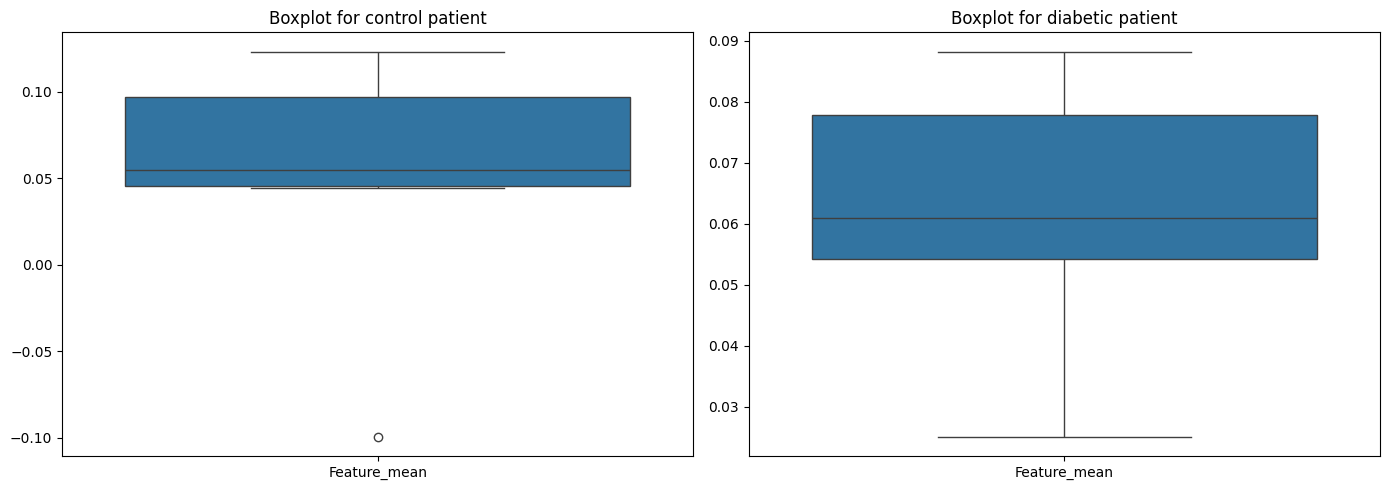

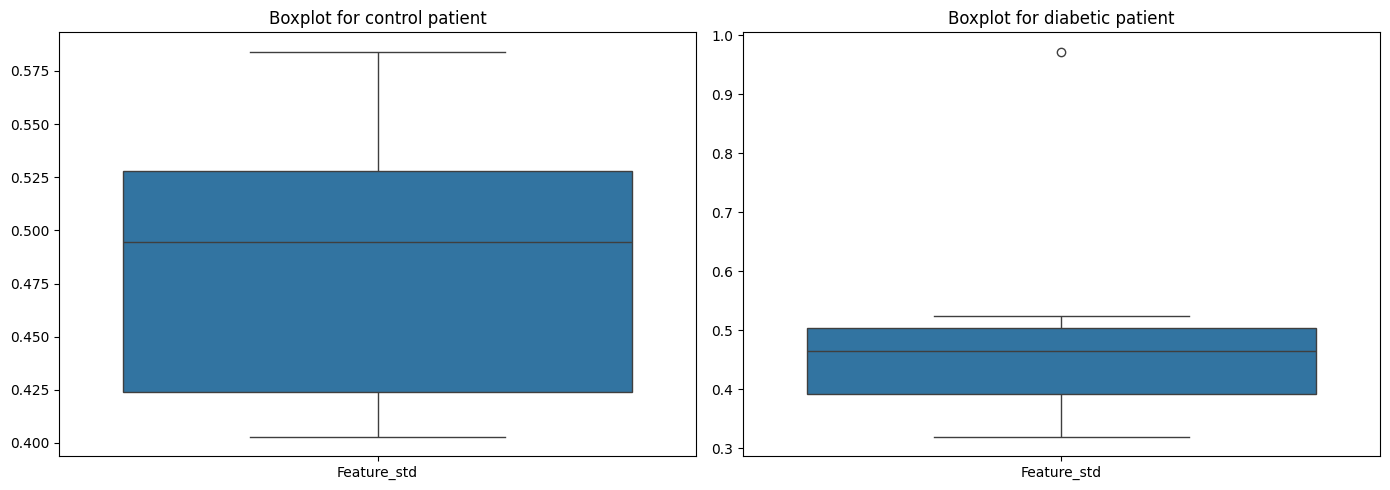

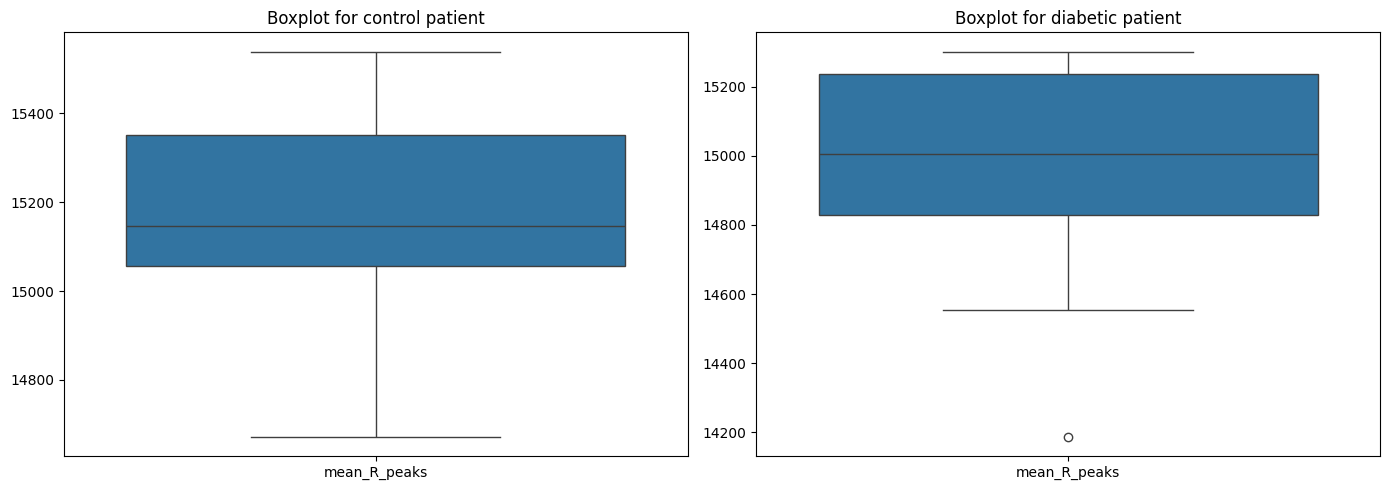

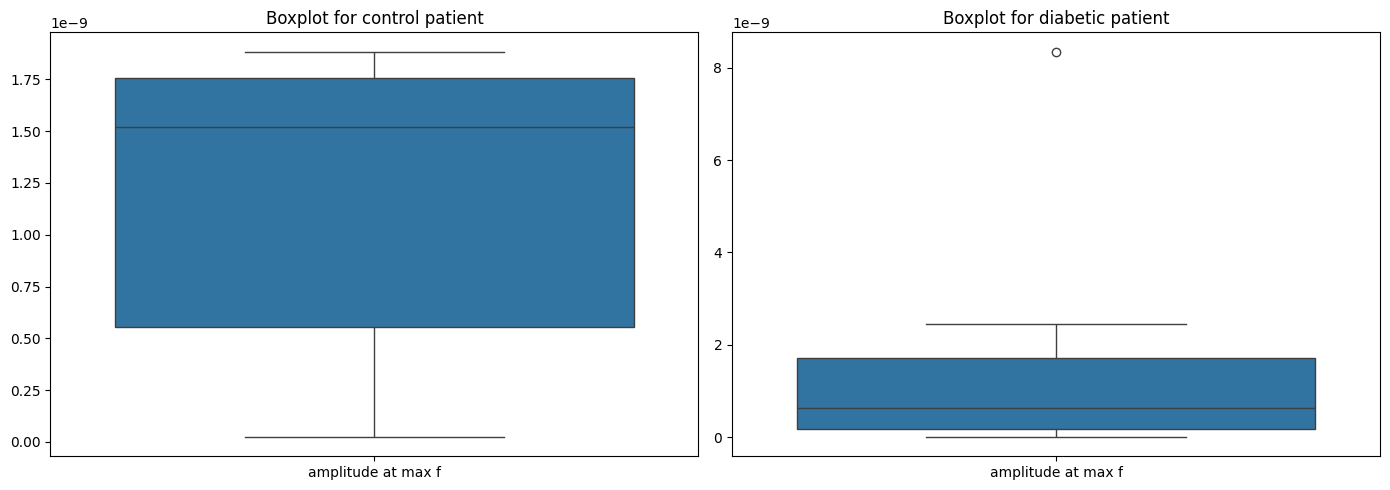

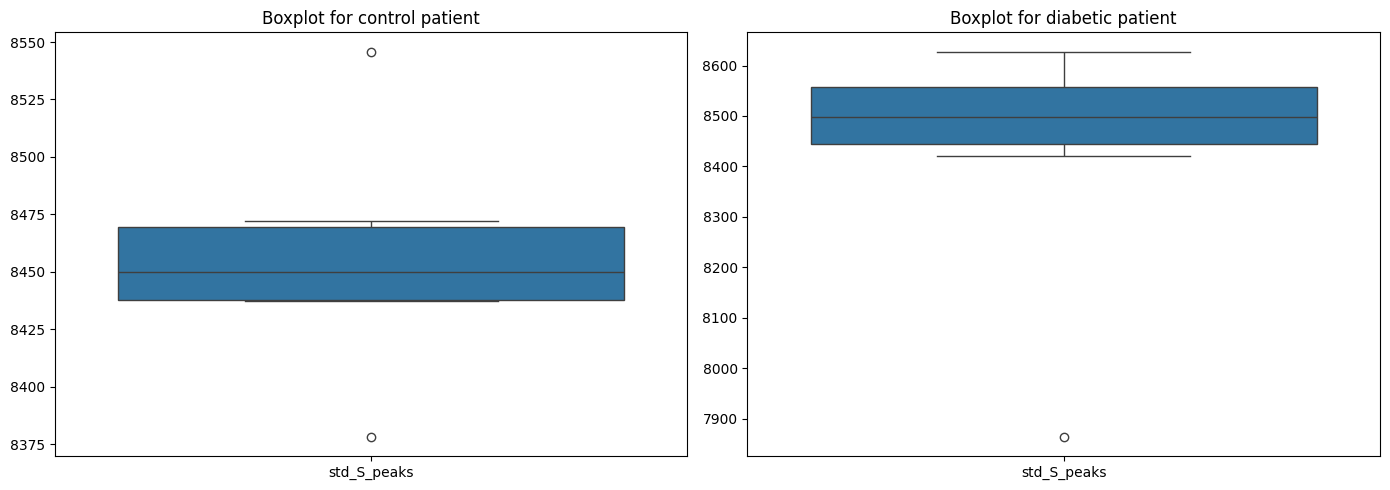

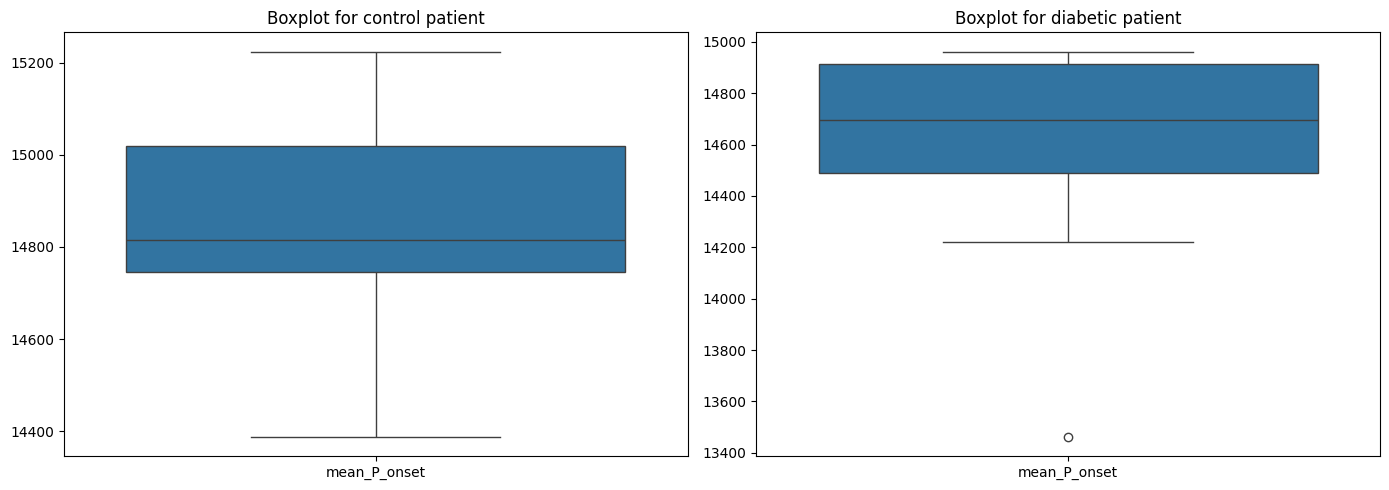

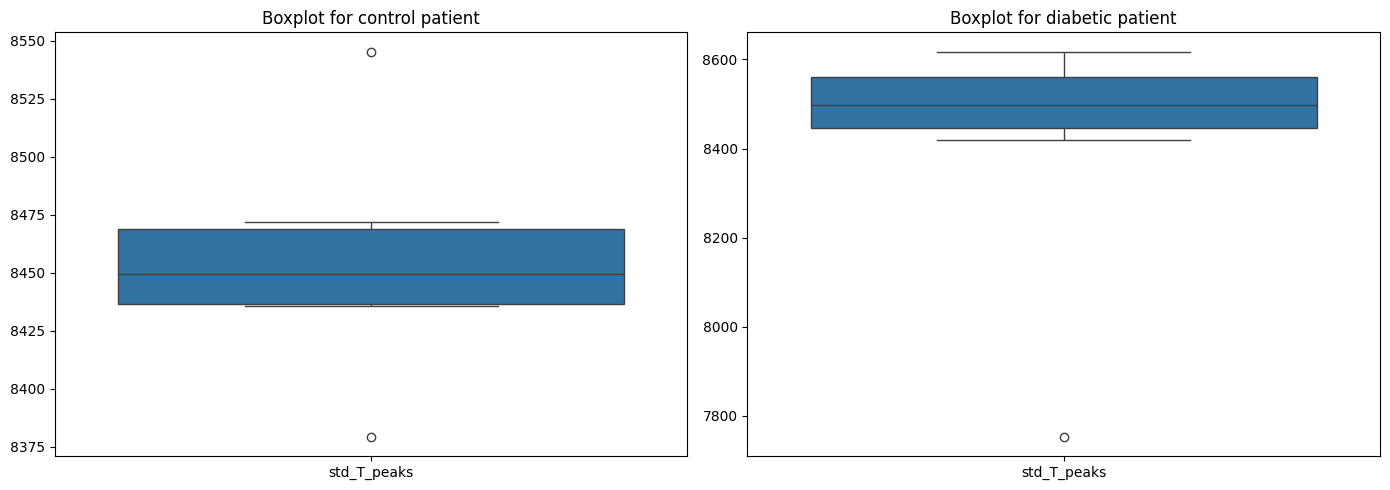

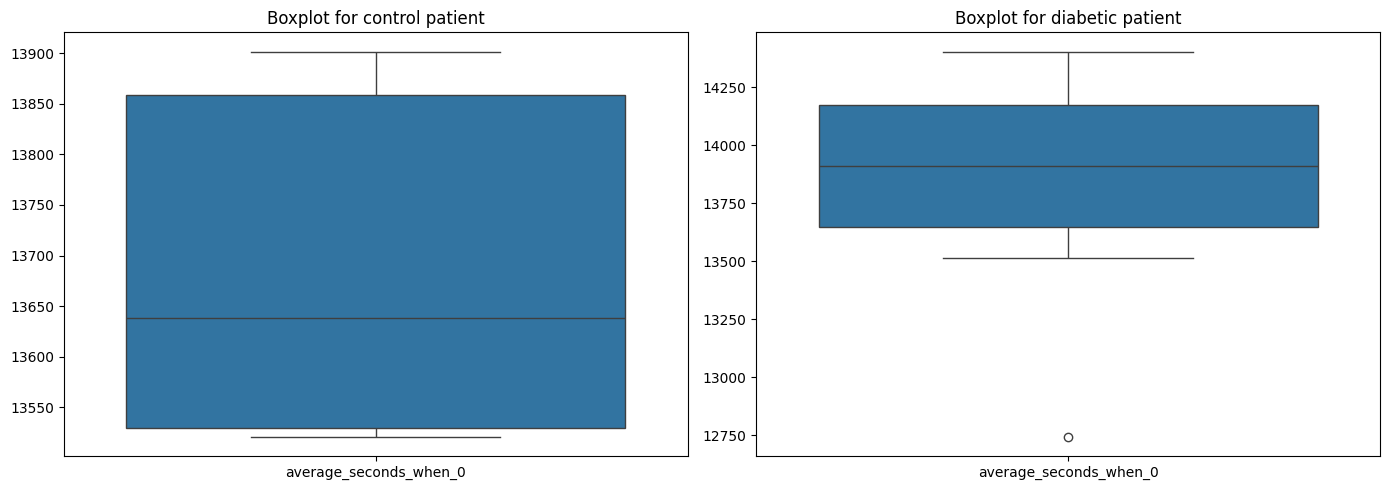

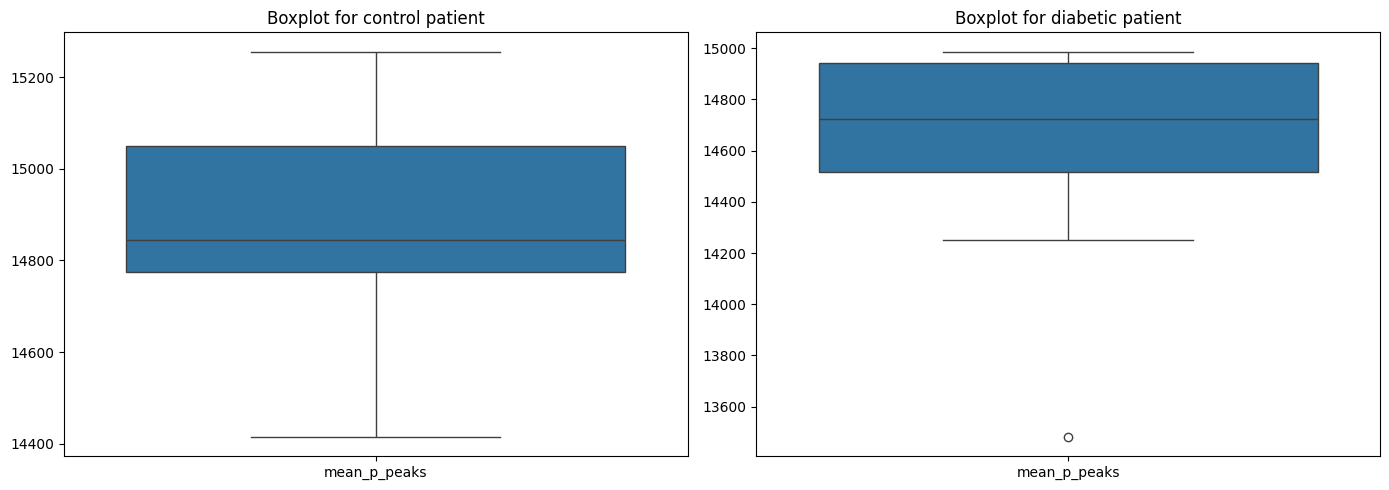

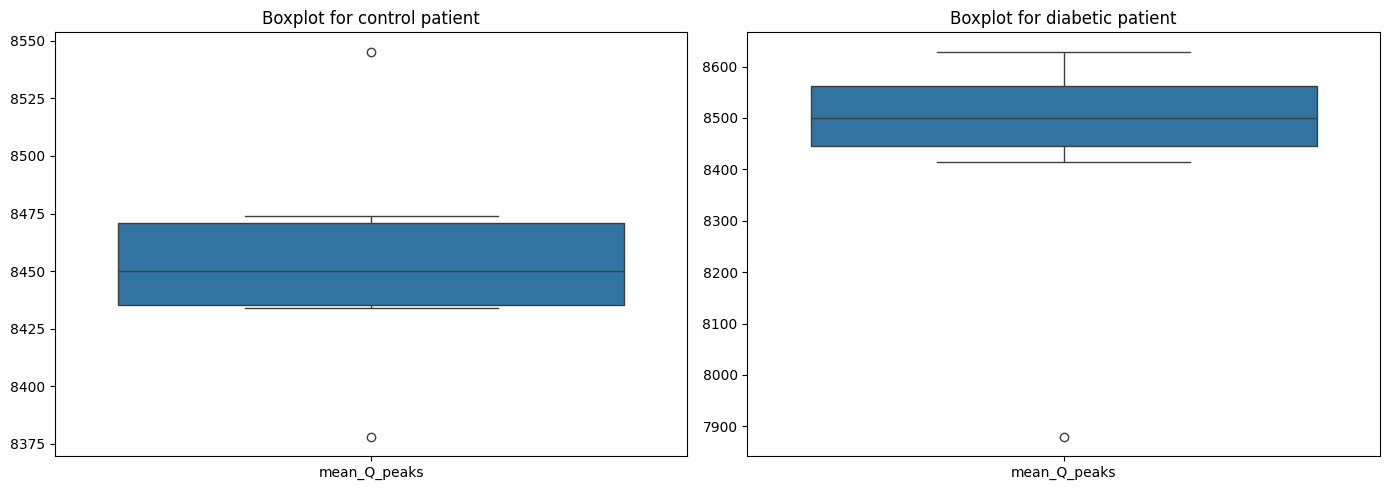

In [13]:
plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cm, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dm, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()


plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cs, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=ds, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()


plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cr, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dr, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cmax, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dmax, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=css, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dss, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cp, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dp, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=ct, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dt, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cswz, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dswz, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cpp, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dpp, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

plt.figure(figsize=(14, 5)) 

# First boxplot
plt.subplot(1, 2, 1)  
sns.boxplot(data=cq, native_scale=True)
plt.title("Boxplot for control patient")

# Second boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=dq, native_scale=True)
plt.title("Boxplot for diabetic patient")

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

<Figure size 100x200 with 0 Axes>

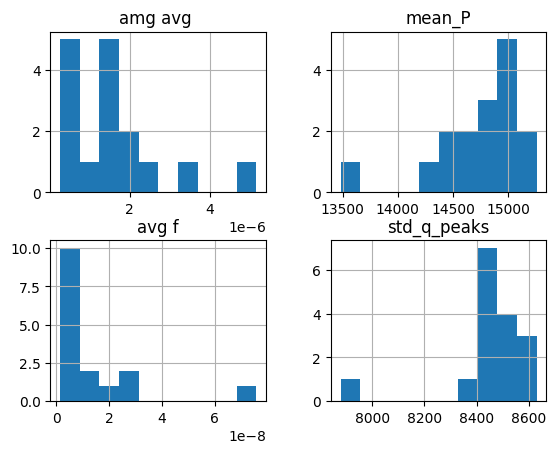

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 100x200 with 0 Axes>

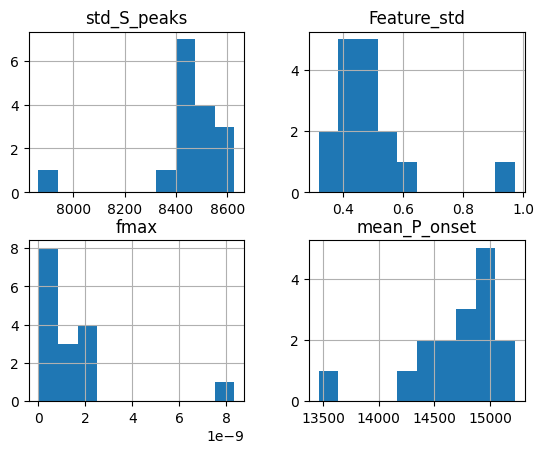

<Figure size 100x200 with 0 Axes>

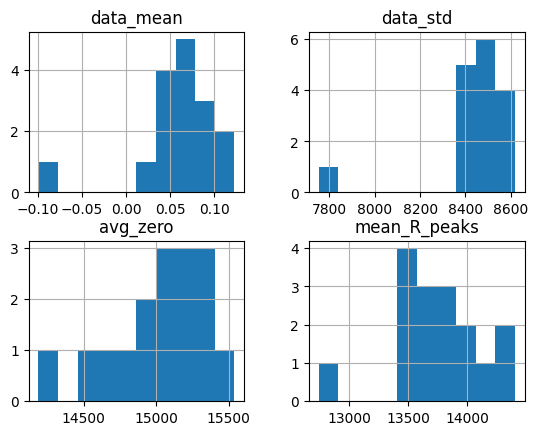

In [14]:
...
# histograms
plt.figure(figsize=(1,2))  # Adjust the width and height as needed

# Plot the histogram
of.hist()


# Show the plot
plt.show()

plt.figure(figsize=(1,2))
uf.hist()
plt.show

plt.figure(figsize=(1,2))
wf.hist()
plt.show

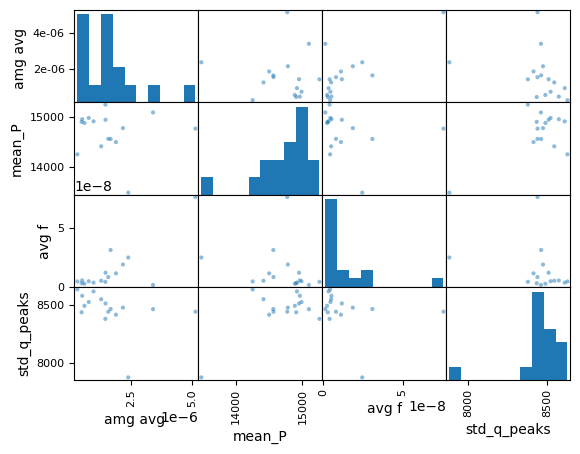

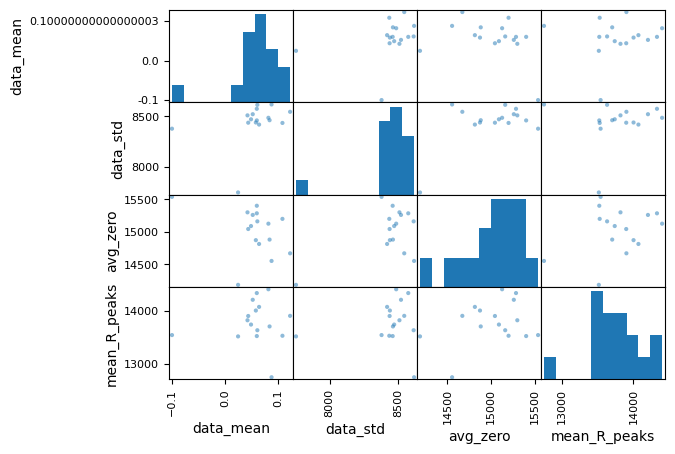

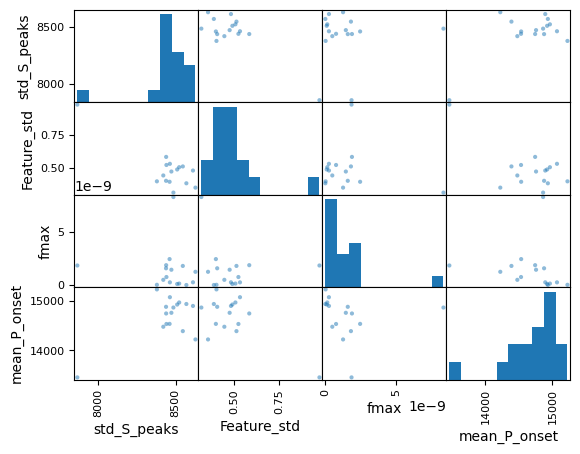

In [15]:
scatter_matrix(of)
pyplot.show()
scatter_matrix(wf)
pyplot.show()
scatter_matrix(uf)
pyplot.show()

In [16]:
pp.corr()


,Feature_mean,Feature_std,mean_R_peaks,mean_T_peaks,std_S_peaks,mean_Q_peaks,mean_P_peaks,mean_P_onset,Average amplitude of periodogram,ampltiude at max frequency,amplitude at avg frequency,avgsecondswhenzero
Feature_mean,1.000000,-0.159403,-0.350525,0.313881,0.336313,-0.290218,-0.241461,-0.241614,-0.206219,0.294823,-0.071951,0.074408
Feature_std,-0.159403,1.000000,-0.539995,-0.845032,-0.829716,-0.598435,-0.659250,-0.657596,0.475203,-0.176584,0.345645,-0.107882
mean_R_peaks,-0.350525,-0.539995,1.000000,0.522830,0.489346,0.993467,0.979319,0.979621,-0.031011,-0.179460,-0.207602,0.295378
mean_T_peaks,0.313881,-0.845032,0.522830,1.000000,0.998061,0.595535,0.664397,0.663022,-0.308109,-0.075825,-0.244710,0.107379
std_S_peaks,0.336313,-0.829716,0.489346,0.998061,1.000000,0.562855,0.631900,0.630591,-0.328420,-0.078152,-0.256825,0.080164
mean_Q_peaks,-0.290218,-0.598435,0.993467,0.595535,0.562855,1.000000,0.994707,0.994895,-0.054765,-0.137143,-0.215768,0.306046
mean_P_peaks,-0.241461,-0.659250,0.979319,0.664397,0.631900,0.994707,1.000000,0.999971,-0.068178,-0.128763,-0.211705,0.296544
mean_P_onset,-0.241614,-0.657596,0.979621,0.663022,0.630591,0.994895,0.999971,1.000000,-0.068693,-0.127032,-0.212881,0.299700
Average amplitude of periodogram,-0.206219,0.475203,-0.031011,-0.308109,-0.328420,-0.054765,-0.068178,-0.068693,1.000000,-0.095748,0.783000,-0.011103
ampltiude at max frequency,0.294823,-0.176584,-0.179460,-0.075825,-0.078152,-0.137143,-0.128763,-0.127032,-0.095748,1.000000,0.074525,0.278602


In [17]:
array = lf.values
X = array[:,0:12]
y = array[:,12]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)


In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [46]:
import warnings

# Suppress warnings
#warnings.filterwarnings("ignore", category=LineSearchWarning)
#warnings.filterwarnings("ignore", category=ConvergenceWarning)


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MiniBatchKMeans, MeanShift, SpectralClustering, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have X and y as your feature matrix and target variable, and you split your data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [
    ('LR', LogisticRegression(penalty=None, C=1.0, solver='newton-cg', max_iter=100, random_state=42, class_weight='balanced')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier(  n_estimators=50,      # Number of trees in the forest
    min_samples_split=2,    # Minimum number of samples required to split an internal node
    min_samples_leaf=2,     # Minimum number of samples required to be at a leaf node
    bootstrap=False,         # Whether bootstrap samples are used when building trees
    random_state=42   )),
    ('AdaBoost', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier()),
    ('MLP', MLPClassifier()),
    ('Perceptron', Perceptron()),
    ('SGD', SGDClassifier()),
    ('NuSVC', NuSVC()),
    ('IsolationForest', IsolationForest()),
    (('SVM', SVC(gamma='auto'))), 
    (('NB', GaussianNB())),
]


# Iterate over models
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, Y_train)

    # Make predictions on the validation set
    predictions = model.predict(X_validation)
    print(confusion_matrix(Y_validation, predictions))

    # Evaluate the model using metrics
    #precision = precision_score(Y_validation, predictions, zero_division=1)
    #recall = recall_score(Y_validation, predictions, zero_division=1)
    #f1 = f1_score(Y_validation, predictions, zero_division=1)
    #accuracy = accuracy_score(Y_validation, predictions)

    # Print the results for each model
    from sklearn.metrics import precision_score
    pr=precision_score(Y_validation, predictions, average='macro', zero_division=1)
    from sklearn.metrics import recall_score
    rec=recall_score(Y_validation, predictions, average='macro', zero_division=1)
    from sklearn.metrics import f1_score
    f1=f1_score(Y_validation, predictions, average='macro')
    from sklearn.metrics import accuracy_score
    accuracy =accuracy_score(Y_validation, predictions)

    print(f"{name}:")
    print("Precision:", pr)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)
    print("\n")


[[1 0]
 [1 2]]
LR:
Precision: 0.75
Recall: 0.8333333333333333
F1 Score: 0.7333333333333334
Accuracy: 0.75


[[0 1]
 [1 2]]
LDA:
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1 Score: 0.3333333333333333
Accuracy: 0.5


[[1 0]
 [1 2]]
KNN:
Precision: 0.75
Recall: 0.8333333333333333
F1 Score: 0.7333333333333334
Accuracy: 0.75


[[1 0]
 [1 2]]
CART:
Precision: 0.75
Recall: 0.8333333333333333
F1 Score: 0.7333333333333334
Accuracy: 0.75


[[0 1]
 [0 3]]
RF:
Precision: 0.875
Recall: 0.5
F1 Score: 0.42857142857142855
Accuracy: 0.75


[[1 0]
 [1 2]]
AdaBoost:
Precision: 0.75
Recall: 0.8333333333333333
F1 Score: 0.7333333333333334
Accuracy: 0.75


[[1 0]
 [1 2]]
GBM:
Precision: 0.75
Recall: 0.8333333333333333
F1 Score: 0.7333333333333334
Accuracy: 0.75


[[1 0]
 [1 2]]
ExtraTrees:
Precision: 0.75
Recall: 0.8333333333333333
F1 Score: 0.7333333333333334
Accuracy: 0.75


[[0 1]
 [1 2]]
Bagging:
Precision: 0.3333333333333333
Recall: 0.3333333333333333
F1 Score: 0.3333333333333333
Accurac

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [20]:
x = []
x.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
x.append(('LDA', LinearDiscriminantAnalysis()))
x.append(('KNN', KNeighborsClassifier()))
x.append(('CART', DecisionTreeClassifier()))
x.append(('NB', GaussianNB()))
x.append(('SVM', SVC(gamma='auto')))
x.append(('ExtraTrees', ExtraTreesClassifier()))


In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have X and y as your feature matrix and target variable, and you split your data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models for voting
models_for_voting = [
    ('LR', LogisticRegression(penalty=None, C=1.0, solver='newton-cg', max_iter=100, random_state=42, class_weight='balanced')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('Bagging', BaggingClassifier())
]

# Create a list of (name, model) tuples for the VotingClassifier
voting_models = [(name, model) for name, model in models_for_voting]

# Create the VotingClassifier
voting_classifier = VotingClassifier(estimators=voting_models, voting='soft')

# Fit the VotingClassifier to the training data
voting_classifier.fit(X_train, Y_train)

# Make predictions on the validation set
predictions = voting_classifier.predict(X_validation)
print(confusion_matrix(Y_validation, predictions))
# Evaluate the model using metrics
precision = precision_score(Y_validation, predictions, average='macro', zero_division=1)
recall = recall_score(Y_validation, predictions, average='macro', zero_division=1)
f1 = f1_score(Y_validation, predictions, average='macro')
accuracy = accuracy_score(Y_validation, predictions)

# Print the results for the VotingClassifier
print("Voting Classifier:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


[[1 0]
 [1 2]]
Voting Classifier:
Precision: 0.75
Recall: 0.8333333333333333
F1 Score: 0.7333333333333334
Accuracy: 0.75


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [22]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have X and y as your feature matrix and target variable, and you split your data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_validation, Y_validation))
# Make predictions on the validation set
predictions = (model.predict(X_validation) > 0.5).astype(int)
print(confusion_matrix(Y_validation, predictions))
# Evaluate the model using metrics
precision = precision_score(Y_validation, predictions, zero_division=1)
recall = recall_score(Y_validation, predictions, zero_division=1)
f1 = f1_score(Y_validation, predictions, zero_division=1)
accuracy = accuracy_score(Y_validation, predictions)

# Print the results for the neural network
print("Neural Network:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Epoch 1/10
1/1 [==============================] - 0s 270ms/step - loss: 1005.0388 - accuracy: 0.4167 - val_loss: 563.3969 - val_accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 450.4586 - accuracy: 0.4167 - val_loss: 51.1738 - val_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 70.1267 - accuracy: 0.5833 - val_loss: 138.0109 - val_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 213.6010 - accuracy: 0.5833 - val_loss: 149.2348 - val_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 232.6383 - accuracy: 0.5833 - val_loss: 112.2337 - val_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 172.0626 - accuracy: 0.5833 - val_loss: 41.3771 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 55.9797 - accuracy: 0.5833 - val_loss: 179.3521 - val_accuracy: 0.2500
E

In [23]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.433333 (0.226078)
LDA: 0.333333 (0.182574)
KNN: 0.333333 (0.182574)
CART: 0.466667 (0.323179)
RF: 0.433333 (0.226078)
AdaBoost: 0.166667 (0.210819)
GBM: 0.366667 (0.194365)
ExtraTrees: 0.633333 (0.194365)
Bagging: 0.533333 (0.244949)
MLP: 0.566667 (0.081650)
Perceptron: 0.500000 (0.105409)
SGD: 0.433333 (0.081650)
NuSVC: 0.466667 (0.323179)
IsolationForest: 0.500000 (0.105409)
SVM: 0.566667 (0.081650)
NB: 0.600000 (0.226078)


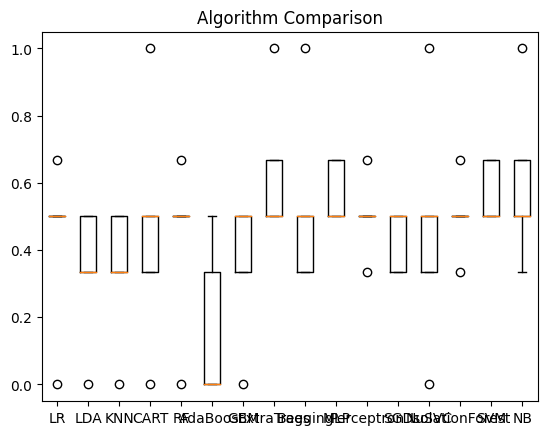

In [24]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [25]:
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [26]:
predictions


# Your recall and F-score calculation
#recall = recall_score(lf[11], predictions, zero_division=1)
#f1 = f1_score(lf[11], predictions, zero_division=1)


array([1., 1., 0., 1.])

In [27]:
classification_report(Y_validation, predictions, zero_division=1)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00         1\n         1.0       1.00      1.00      1.00         3\n\n    accuracy                           1.00         4\n   macro avg       1.00      1.00      1.00         4\nweighted avg       1.00      1.00      1.00         4\n'

In [28]:
print(confusion_matrix(Y_validation, predictions))

[[1 0]
 [0 3]]


In [29]:
from sklearn.metrics import precision_score
pr=precision_score(Y_validation, predictions, average='macro')
print(pr)
from sklearn.metrics import recall_score
rec=recall_score(Y_validation, predictions, average='macro')
print(rec)
from sklearn.metrics import f1_score
f1=f1_score(Y_validation, predictions, average='macro')
print(f1)



1.0
1.0
1.0
